# Handwritten Digit Recognition using KNN Algorithm

In [2]:
# Importing the dataset
from sklearn.datasets import load_digits
digits=load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Print to show there are 1797 images (8 by 8 images: dimensionality of 64)
print('Image Dataset Shape', digits.data.shape)

Image Dataset Shape (1797, 64)


In [5]:
first_image=digits.data[1500,:]
print(first_image)

[ 0.  0.  0.  3. 12. 12.  2.  0.  0.  0.  7. 15. 16. 16.  0.  0.  0.  4.
 15.  9. 14. 16.  3.  0.  0.  2.  0.  0. 14. 16.  0.  0.  0.  0.  0.  0.
 14. 16.  0.  0.  0.  0.  0.  0. 15. 13.  0.  0.  0.  0.  0.  0. 16. 14.
  1.  0.  0.  0.  0.  3. 16. 13.  2.  0.]


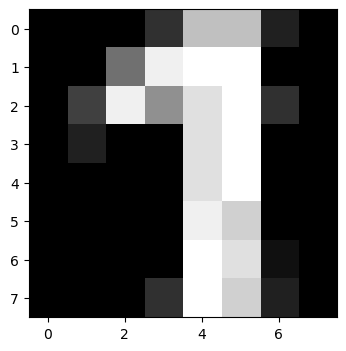

In [6]:
plt.figure(figsize=(10,4))
plt.imshow(np.reshape(first_image, (8,8)), cmap=plt.cm.gray)

# Visualizing Dataset

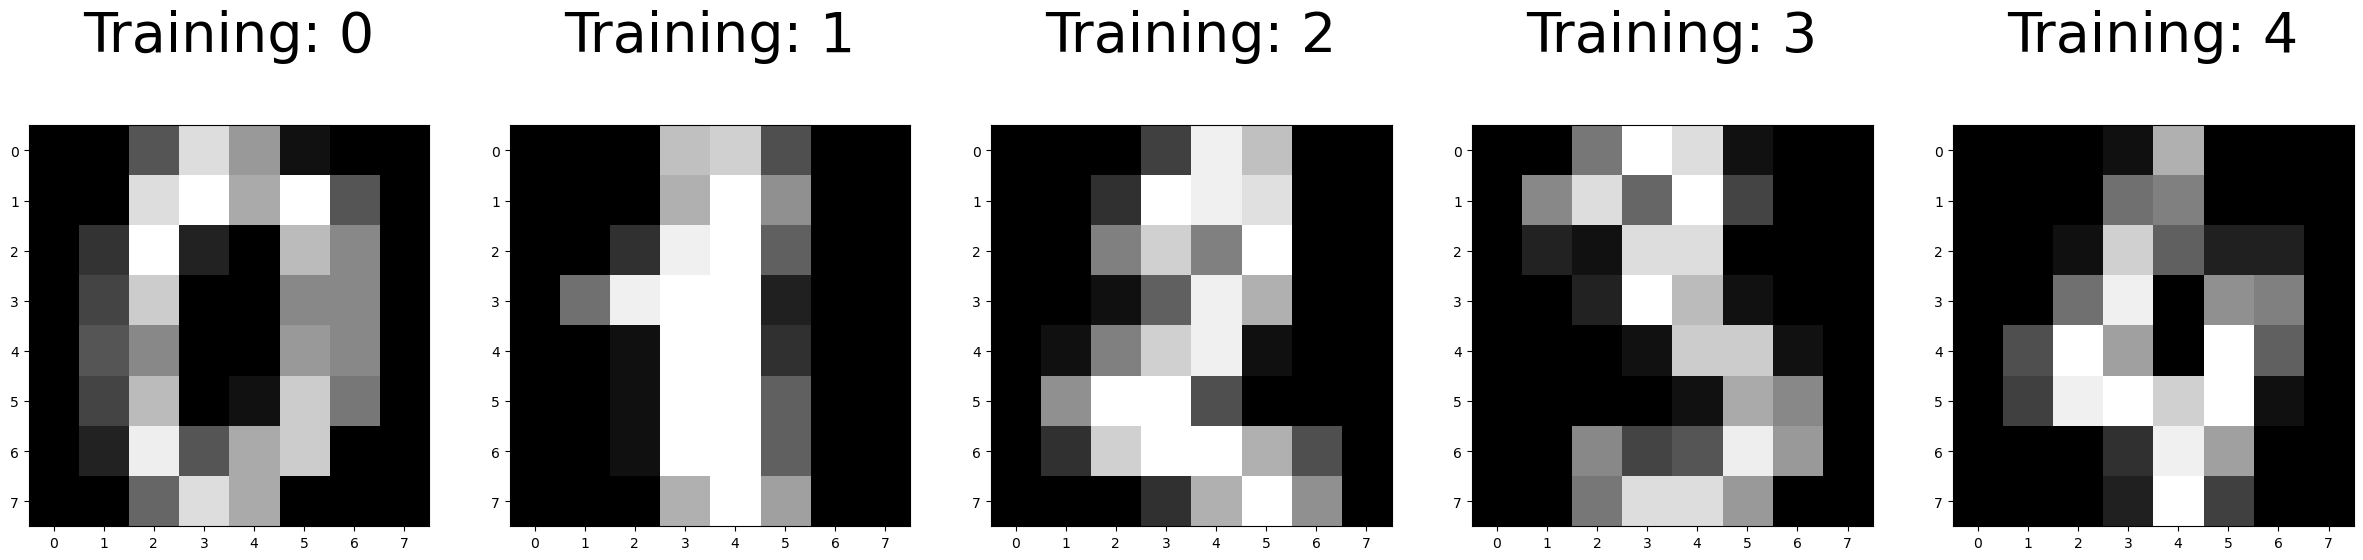

In [7]:
plt.figure(figsize=(30,7))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize=40)

# Splitting Dataset

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=100)

In [9]:
x_train.shape

(1437, 64)

In [10]:
x_test.shape

(360, 64)

In [11]:
y_test.shape

(360,)

# Training and Testing

In [12]:
# Finally we are training our KNeighborsClassifier Model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
predictions=classifier.predict(x_test)

score=classifier.score(x_test, y_test)
print(score)

0.9861111111111112


In [55]:
predictions.shape

(360,)

In [56]:
y_test.shape

(360,)

In [57]:
x_test.shape

(360, 64)

# Model Evaluation

In [59]:
answer=classifier.predict(x_test[120,:].reshape(1,-1))
print(answer, y_test[120])

[2] 2


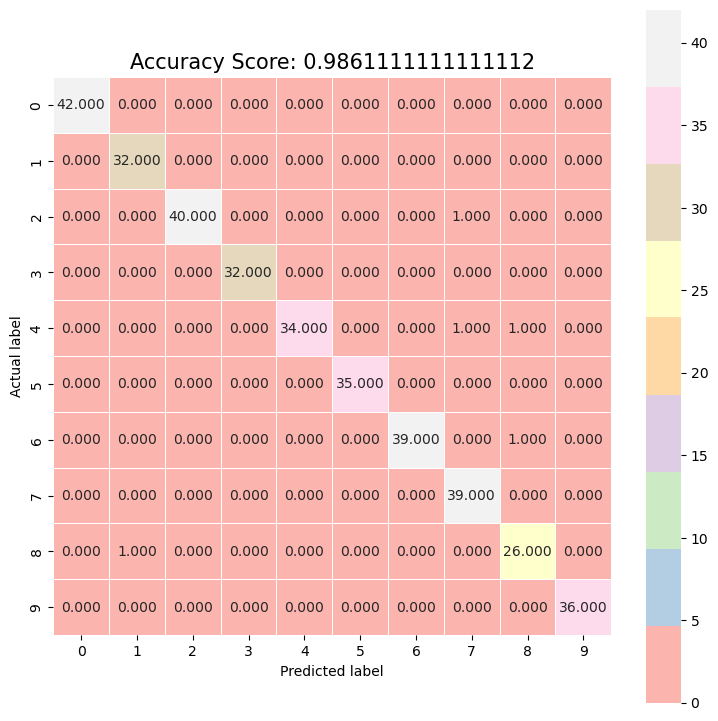

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidth=.5, square=True, cmap='Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title='Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15);

# Comparing Error Rate with the K Value

In [63]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

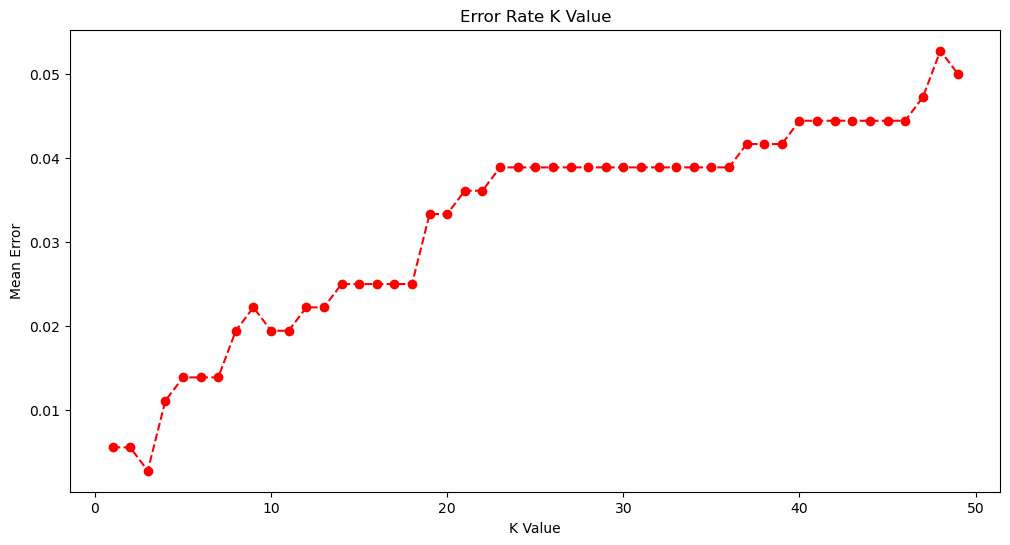

In [66]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o')
plt.title('Error Rate K Value')
plt.xlabel('K Value');
plt.ylabel('Mean Error');

# Saving the Model

In [67]:
import joblib
joblib.dump(classifier, 'NEW-KNN-Model-digit-classification')

['NEW-KNN-Model-digit-classification']